<a href="https://colab.research.google.com/github/Dvaalmeyda/deteksi-kemiripan-judul-skripsi/blob/main/AUGMENTASI_DATA_PARAFRASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from bert_score import score

In [ ]:
url_data = 'https://docs.google.com/spreadsheets/d/1YAuYZa_LFqxqOpiMgFr-imZRoiIaNSZGDscOvY30tb8/export?gid=1995114602&format=csv'

In [ ]:
df = pd.read_csv(url_data)

In [ ]:
# Ambil data yang berlabel 0
data_label_0 = df[df['label'] == 0]

In [ ]:
data_label_0.count()

,0
id,3934
judul 1,3934
judul 2,3934
judul 1 processed,3934
judul 2 processed,3934
Precision,3934
Recall,3934
F1,3934
label,3934


In [ ]:
data_parafrase = data_label_0.head(1000)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
# Load tokenizer dan model IndoT5
tokenizer = AutoTokenizer.from_pretrained("Wikidepia/IndoT5-base-paraphrase")
model = AutoModelForSeq2SeqLM.from_pretrained("Wikidepia/IndoT5-base-paraphrase")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/777k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
# Fungsi untuk parafrase kalimat
def paraphrase_sentence(sentence):
    # Menambahkan prefix untuk parafrase
    text = "paraphrase: " + sentence + " </s>"

    # Tokenisasi input
    encoding = tokenizer(text, padding='longest', return_tensors="pt")

    # Generate parafrase
    outputs = model.generate(
        input_ids=encoding["input_ids"],
        attention_mask=encoding["attention_mask"],
        max_length=512,
        do_sample=True,
        top_k=200,
        top_p=0.95,
        early_stopping=True,
        num_return_sequences=1  # Hanya mengambil satu parafrase
    )

    # Decode hasil parafrase
    paraphrased_sentence = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return paraphrased_sentence

In [ ]:
# Terapkan fungsi parafrase ke seluruh kolom 'judul 1'
data_parafrase['judul_1_parafrase'] = data_parafrase['judul 1'].apply(paraphrase_sentence)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:676: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
<ipython-input-19-6b26f81d862b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_parafrase['judul_1_parafrase'] = data_parafrase['judul 1'].apply(paraphrase_sentence)


In [ ]:
data_parafrase[['judul 1', 'judul_1_parafrase']]

,judul 1,judul_1_parafrase
1534,disappear automatically retaliatory target (da...,Disappear otomatis target retaliatori (dart) -...
1535,implementasi regulator lm723 dan lm317 pada ca...,Pelaksanaan regulator LM723 dan LM317 pada cat...
1536,disappear automatically retaliatory target (da...,Penyerapan otomatis tujuan retaliatur (dart) o...
1537,disappear automatically retaliatory target (da...,: Jalur otomatis retaliatory yang dipadatkan (...
1538,relai differensial sebagai proteksi utama tran...,relai diferensial sebagai proteksi primer dari...
...,...,...
2529,implementasi ic tl494 pada catu daya arus sear...,Implementasi ic tl494 pada baterai arus searah...
2530,analisis beban ekonomis di pt. indonesia power...,analisis beban ekonomis di unit Pembangkitan I...
2531,analisis redaman lintasan sinyal di luar bangu...,analisis redaman lintasan sinyal di luar bangu...
2532,implementasi regulator lm723 dan lm317 pada ca...,Implementasi Regulator Ampere Lm723 dan lm317 ...


In [ ]:
data_parafrase.to_excel('parafrase.xlsx')

In [ ]:
import pandas as pd
import re
import nltk
import torch
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [ ]:
# Download NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load stopwords Bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Filtering & Casefolding
def remove_punctuation(text):
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\s+', ' ', text)
  text = text.lower()
  return text

# Helper Function Tokenisasi nltk
def tokenize_nltk_stopwords(text):
    # Tokenisasi
    tokens = word_tokenize(text)
    # Stopwords removal
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Fungsi untuk menggabungkan token kembali menjadi kalimat
def join_tokens(tokens):
    return ' '.join(tokens)

# Main Function - Preprocessing
def preprocess_text(text):
    text = remove_punctuation(text)
    tokens = tokenize_nltk_stopwords(text)
    processed_text = join_tokens(tokens)
    return processed_text

In [ ]:
# judul terindikasi mirip
data_parafrase['judul 1 processed'] = data_parafrase['judul 1'].apply(preprocess_text)
data_parafrase['judul parafrase processed'] = data_parafrase['judul_1_parafrase'].apply(preprocess_text)

<ipython-input-27-e9b410e964bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_parafrase['judul 1 processed'] = data_parafrase['judul 1'].apply(preprocess_text)
<ipython-input-27-e9b410e964bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_parafrase['judul parafrase processed'] = data_parafrase['judul_1_parafrase'].apply(preprocess_text)


In [ ]:
# Fungsi untuk memuat CSV dan menghitung BERTScore
def calculate_bertscore(df):

    # Ambil kolom "judul 1 processed" dan "judul 2 processed"
    cands = df['judul 1 processed'].tolist()
    refs = df['judul parafrase processed'].tolist()

    # Hitung BERTScore
    P, R, F1 = score(cands,
                 refs,
                 lang="id",
                 verbose=True,
                 model_type='indobenchmark/indobert-large-p2',
                 num_layers= 24,
                 )

    # Masukkan nilai Precision, Recall, dan F1 ke dalam tabel
    df['Precision'] = P.numpy()
    df['Recall'] = R.numpy()
    df['F1'] = F1.numpy()

    return df

In [ ]:
result_df = calculate_bertscore(data_parafrase)

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/17 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/16 [00:00<?, ?it/s]

done in 353.40 seconds, 2.83 sentences/sec


<ipython-input-28-f2c67f4dedb2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Precision'] = P.numpy()
<ipython-input-28-f2c67f4dedb2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Recall'] = R.numpy()
<ipython-input-28-f2c67f4dedb2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [ ]:
# Tambahkan label berdasarkan nilai similarity
def add_label(similarity):
    return 1 if similarity >= 0.5 else 0

In [ ]:
# Labeling
result_df['label'] = result_df['F1'].apply(add_label)

<ipython-input-31-4084d7a44dc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['label'] = result_df['F1'].apply(add_label)


In [ ]:
# Hitung total label 1 & 0
total_label_1 = len(result_df[result_df['label'] == 1])
total_label_0 = len(result_df[result_df['label'] == 0])

print('Total Label 1:', total_label_1)
print('\n===========\n')
print('Total Label 0:', total_label_0)

Total Label 1: 998


Total Label 0: 2


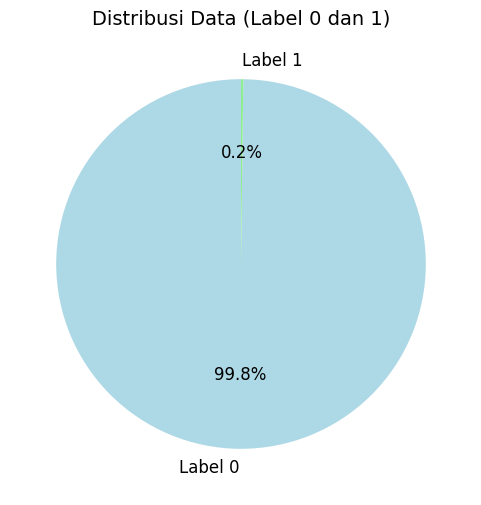

In [ ]:
# Hitung distribusi label
label_counts = result_df['label'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    label_counts,
    labels=["Label 0", "Label 1"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightblue", "lightgreen"],
    textprops={"fontsize": 12}
)
plt.title("Distribusi Data (Label 0 dan 1)", fontsize=14)
plt.show()

#### MERGE DATA

In [ ]:
# Ganti data pada result_df
result_df['judul 2'] = result_df['judul_1_parafrase']
result_df['judul 2 processed'] = result_df['judul parafrase processed']

<ipython-input-87-3da5396e38d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['judul 2'] = result_df['judul_1_parafrase']
<ipython-input-87-3da5396e38d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['judul 2 processed'] = result_df['judul parafrase processed']


In [ ]:
fix_result_df = result_df.drop(columns=['judul_1_parafrase', 'judul parafrase processed'])

In [ ]:
# Gabungkan data df dan result_df berdasarkan 'id'
df_updated = df.copy()  # Membuat salinan df agar tidak memodifikasi df asli

In [ ]:
# Update df_updated dengan data dari fix_result_df berdasarkan id yang sama
df_updated.update(fix_result_df.set_index('id'))

In [ ]:
# Hitung total label 1 & 0
total_label_1 = len(df_updated[df_updated['label'] == 1])
total_label_0 = len(df_updated[df_updated['label'] == 0])

print('Total Label 1:', total_label_1)
print('\n===========\n')
print('Total Label 0:', total_label_0)

Total Label 1: 1858


Total Label 0: 3610
